<a href="https://colab.research.google.com/github/Pr-abin/100-_problem_in_NLP/blob/main/ML_Notebook_6_PyTorch_Regression_FireForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch


PyTorch is a freely available software library for machine learning that is utilized in a wide range of tasks related to understanding language and perception. It is actively employed by multiple teams at Meta Platforms, both for research purposes and in production settings. Numerous deep learning software solutions have been developed using PyTorch, such as **Tesla** Autopilot, **Uber**'s Pyro, **Hugging Face's Transformer**s, PyTorch Lightning, and Catalyst.

**PyTorch offers two primary features:
* tensor computing resembling NumPy and
* the ability to construct and train deep neural networks. **

# Device checking

The code snippet below checks the availability of devices and sets the "device" variable for computation:



In [ ]:
import torch

# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Print the selected device
print("Selected device:", device)


Selected device: cuda


The code uses the torch.cuda.is_available() function to check if a GPU is available. If a GPU is present, the "device" variable is set to use CUDA (GPU), otherwise, it is set to use the CPU. The selected device is then printed for confirmation.

# Some Tensor Operation by Torch

In [ ]:
import torch

# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Create tensors
matrix1 = torch.tensor([[3., 3.]], device=device)
matrix2 = torch.tensor([[2.], [2.]], device=device)
# The device parameter specifies the device (either CPU or GPU) on which the tensor should be stored.
# Since the device variable was previously set based on the availability of a CUDA-enabled GPU,
#the tensor will be stored on that GPU if available, otherwise on the CPU.

# Perform matrix multiplication
product = torch.mm(matrix2, matrix1)

# Print the product
print(device)
print(product)
print(float(product[0, 0]))

cuda
tensor([[6., 6.],
        [6., 6.]], device='cuda:0')
6.0


# Tensor Subtraction:

In [ ]:
import torch

# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Create tensors
x = torch.tensor([1.0, 2.0], device=device)
a = torch.tensor([3.0, 3.0], device=device)

# Subtract 'a' from 'x'
sub = torch.subtract(x, a)

# Print the result
print(sub)
print(float(sub)) # this gives error!
#print(sub.cpu().numpy())

tensor([-2., -1.], device='cuda:0')


ValueError: only one element tensors can be converted to Python scalars

**Why it gives error? **

With this no error, try it: print(sub.cpu().numpy())


# What does it mean: sub.cpu().numpy()

 In order to use NumPy with a PyTorch tensor, we need to bring the tensor back to the CPU using the cpu() method and then call numpy() to access the tensor as a NumPy array. If the tensor is already on the CPU, the cpu() function has no effect and simply returns the tensor as is.

# Example of using PyTorch on a math operation:

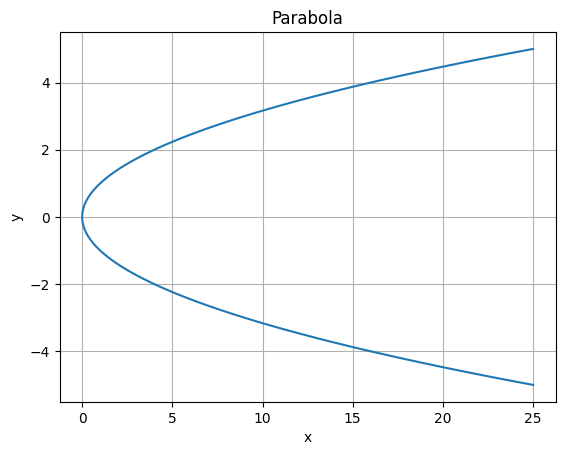

In [ ]:
import torch
import matplotlib.pyplot as plt

# Create a range of values for the x-axis
x = torch.linspace(-5, 5, 100)

# Define the mathematical shape (in this case, a parabola)
y = x**2

# Convert tensors to NumPy arrays
x_np = x.numpy()
y_np = y.numpy()

# Plot the shape
plt.plot(y_np, x_np)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parabola')
plt.grid(True)
plt.show()


In this example, we first create a range of values for the x-axis using torch.linspace to generate 100 equally spaced points between -5 and 5. We then define the mathematical shape, in this case, a parabola, by squaring the x values. Next, we convert the tensors x and y to NumPy arrays using the numpy() method. Finally, we use Matplotlib to plot the shape, setting labels for the x-axis and y-axis, adding a title, enabling gridlines, and displaying the plot with plt.show().

# A regression Example by Pytorch

Here we have applied the regression on a the fireforest dataset:
https://data.heatonresearch.com/data/t81-558/forestfires.csv

Different parameters have been given, and using ML, we predict the burnt area by fire for each location!

Similar approach can be applied for predicting the abalone age:
https://data.heatonresearch.com/data/t81-558/abalone.csv
That is your assignmen, you should do it by modifying the same Colabnotebook, save this colabnotebook, and uploaded it on your own google drive, then modify it for predicting the age of abalone.

Predicting the age of abalone is from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).


In [ ]:

import torch

# finding the device under use:
# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Print the selected device
print("Selected device:", device)


import pandas as pd
from sklearn.model_selection import train_test_split
# imports the train_test_split function from the model_selection module of the sklearn package
# train_test_split is a function commonly used for splitting datasets into training and testing subsets.
from sklearn.metrics import accuracy_score
# accuracy_score is a function used to calculate the accuracy of a classification model by comparing the predicted labels with the true labels.


import torch.nn as nn
#  nn is a sub-package of PyTorch that provides various classes and functions for building neural networks.
import torch.nn.functional as F
# torch.nn.functional provides various activation functions, loss functions, ...
import numpy as np
from torch.autograd import Variable #  for automatic differentiation
from sklearn import preprocessing # for preprocessing and transforming data before feeding it into models.
# It includes scaling, standardizing, encoding categorical variables, and more

# You will create a network class for every PyTorch neural network you create.
class Net(nn.Module):
    def __init__(self, in_count, out_count):
        super(Net, self).__init__() # initializing the Net from the super class.
        # We must define each of the layers.
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, 1)

    def forward(self, x):
        # In the forward pass, we must calculate all of the layers we
        # previously defined.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

Selected device: cuda



The structure of your neural network is defined in the above **Net** class. The specific name of the class is not significant; however, it must inherit from **nn.Module** and implement the **init** and **forward** methods.

Within the init method, you define the layers of the neural network. In this case, the network has an input layer that matches the number of inputs specified from the dataset. These inputs are then connected to 50 neurons in the first hidden layer, which in turn connect to 25 neurons in the second layer. It is important to ensure that the number of output neurons in a layer matches the number of input neurons in the subsequent layer.

The **forward** method plays a crucial role in connecting the layers and specifying the activation functions in your neural network. In our case, we will consistently use the ReLU activation function for the hidden layers. However, **for the output layer of a regression neural network, no activation function is applied**. When it comes to **classification tasks, we utilize the logistic function for binary classification** (involving two classes only) or the **softmax function for classification problems with two or more classes**.

In order for the neural network to function properly, several factors must align.

* Firstly, the **init** method should define the layers with matching numbers of outputs and inputs for each connection. This ensures consistency in the flow of information between the layers.

* Additionally, the forward method plays a crucial role in linking all the layers together in the correct order. By properly connecting the layers, the **forward** method ensures that the data is propagated through the network in a sequential and meaningful way, ultimately leading to accurate predictions or classifications.

In [ ]:
 # Read the dataset.
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/forestfires.csv",
    na_values=['NA', '?'])

loc1 = df['X']
loc2 = df['Y']

# Handle missing value
df['rain'] = df['rain'].fillna(df['rain'].median())

# Pandas to Numpy
x = df[['X', 'Y', 'DC', 'FFMC', 'DMC', 'rain', 'ISI',
       'temp', 'RH', 'wind']].values
y = df['area'].values # target values

# Numpy to PyTorch
x = torch.tensor(x,device=device,dtype=torch.float32)
y = torch.tensor(y,device=device,dtype=torch.float32)


To load the CSV file, Pandas is used as demonstrated before.  **In cases where the  values are missing, the median value is used as a substitute.** **The data is then converted from Pandas to NumPy, and subsequently from NumPy to PyTorch**. Only the selected fields that will be used for prediction are retained. The Net class is designed to automatically adjust the number of input neurons based on the size of this data.

With the data loaded and prepared, it is time to create the neural network, loss function, and optimizer class to facilitate the training process.

In [ ]:
# Define the neural network
model = Net(x.shape[1],1).to(device)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define the loss function for regression
loss_fn = nn.MSELoss()

The neural network is created using the size of input, which is equal to the number of columns in the x-input data. One output neuron is specified to predict the value. For the error function, we use MSELoss, which is commonly used for regression tasks. The Adam optimizer is chosen with a learning rate of 0.01 for training the network. Adam is a popular optimizer, and 0.01 is a reasonable initial learning rate. It's important to note that the learning rate should not exceed 1.0. If the learning rate is too high, the network may fail to learn effectively, while a very low learning rate would result in slow training. Advanced methods for determining the optimal learning rate, such as learning rate schedules, will be covered later.

With all the necessary objects created, we can now proceed to train the neural network.

In [ ]:
# Train for 10000 epochs.
for epoch in range(10000):
    optimizer.zero_grad()
    out = model(x).flatten()
    loss = loss_fn(out, y)
    loss.backward()
    optimizer.step()
# Assignment: go through the above code, make a short note for yourself,

    # Display status every 100 epochs.
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {loss.item()}")

Epoch 0, loss: 4834.59033203125
Epoch 100, loss: 3951.263916015625
Epoch 200, loss: 3730.614990234375
Epoch 300, loss: 3426.549560546875
Epoch 400, loss: 2882.23291015625
Epoch 500, loss: 2514.11279296875
Epoch 600, loss: 2926.951904296875
Epoch 700, loss: 2068.617431640625
Epoch 800, loss: 1684.3121337890625
Epoch 900, loss: 2454.193115234375
Epoch 1000, loss: 1812.0714111328125
Epoch 1100, loss: 1433.5450439453125
Epoch 1200, loss: 1291.8984375
Epoch 1300, loss: 1191.12939453125
Epoch 1400, loss: 1025.2928466796875
Epoch 1500, loss: 869.455322265625
Epoch 1600, loss: 737.9486694335938
Epoch 1700, loss: 600.3748779296875
Epoch 1800, loss: 1428.8013916015625
Epoch 1900, loss: 472.2813720703125
Epoch 2000, loss: 426.26055908203125
Epoch 2100, loss: 399.2085876464844
Epoch 2200, loss: 381.314697265625
Epoch 2300, loss: 368.8194885253906
Epoch 2400, loss: 363.4410095214844
Epoch 2500, loss: 349.96881103515625
Epoch 2600, loss: 342.708740234375
Epoch 2700, loss: 336.1187744140625
Epoch 280


In the training process, we iterate over 10,000 epochs, where each epoch represents a complete pass over the training set. At the start of each epoch, we zero the gradients to ensure that the gradients from the previous epoch don't influence the current epoch's training. The entire training set is presented to the model as one large batch. In more advanced techniques, we'll explore different ways to segment the data for training.

During each epoch, we apply the loss function to calculate the loss between the predicted output and the actual target values. Then, using backpropagation, we compute the gradients of the loss with respect to the network weights. These gradients are used to update the weights, making incremental adjustments to improve the network's performance.

# Introducing Hyperparameters of the network


The neural network consists of multiple hidden layers, with varying numbers of neurons such as 50 and 25. The decision on the number of neurons in each layer is a common concern in neural networks. Unfortunately, there is no definitive answer as it depends on the specific problem and data. These choices are known as hyperparameters, which significantly impact the performance of the neural network, yet there is no universally agreed-upon method for setting them.

Generally, having more hidden neurons enhances the network's ability to handle complex problems. However, excessive neurons can lead to overfitting and longer training times. On the other hand, too few neurons can result in underfitting and reduced accuracy. Additionally, the number of layers is another hyperparameter to consider. In general, more layers allow the network to perform advanced data preprocessing and feature engineering. However, this comes at the cost of increased training time and the risk of overfitting. It is common to observe a pattern where the number of neurons starts higher near the input layer and gradually decreases towards the output layer, forming a triangular shape.

# Giving the Prediction value

We will proceed with making real predictions. The program will store these predictions in the variable "**pred**". These predictions represent the values estimated by the neural network. It's worth noting that the shape of "**pred**" is a 2D array. You can always determine the dimensions of the output by printing **"pred.shape**". Neural networks have the capability to produce multiple outputs, hence the array format. In this case, the neural network generates only one value per prediction Nonetheless, a 2D array is used to accommodate the possibility of multiple values being returned by the neural network.


In [ ]:
pred = model(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: torch.Size([517, 1])
tensor([[  6.9087],
        [-12.3645],
        [-22.4224],
        [  7.3321],
        [ -3.2382],
        [  9.2181],
        [  6.4532],
        [ -3.3428],
        [  0.9024],
        [ -8.4254]], grad_fn=<SliceBackward0>)


To evaluate the accuracy of the predictions, we need to compare the predicted values to the actual  values. This allows us to measure how closely the neural network estimated the values. One way to assess this is by calculating the Root Mean Square Error (RMSE) using the Sklearn library. However, before using Sklearn, we need to bring the predictions back to the CPU and detach them from the neural network graph. The code snippet below demonstrates how to achieve this using "**cpu().detach()**".

In [ ]:
from sklearn import metrics

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred.cpu().detach(),
  y.cpu().detach()))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 44.817604064941406


It can be also done in easier way in coddign using just PyTorch:

In [ ]:
score = torch.sqrt(torch.nn.functional.mse_loss(pred.flatten(),y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 21.260713577270508


In [ ]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. XY: {loc1[i]}, {loc2[i]}, areas: {y[i]}, "
          + f"predicted area: {pred[i]}")

1. XY: 7, 5, areas: 0.0, predicted area: tensor([6.9087], grad_fn=<SelectBackward0>)
2. XY: 7, 4, areas: 0.0, predicted area: tensor([-12.3645], grad_fn=<SelectBackward0>)
3. XY: 7, 4, areas: 0.0, predicted area: tensor([-22.4224], grad_fn=<SelectBackward0>)
4. XY: 8, 6, areas: 0.0, predicted area: tensor([7.3321], grad_fn=<SelectBackward0>)
5. XY: 8, 6, areas: 0.0, predicted area: tensor([-3.2382], grad_fn=<SelectBackward0>)
6. XY: 8, 6, areas: 0.0, predicted area: tensor([9.2181], grad_fn=<SelectBackward0>)
7. XY: 8, 6, areas: 0.0, predicted area: tensor([6.4532], grad_fn=<SelectBackward0>)
8. XY: 8, 6, areas: 0.0, predicted area: tensor([-3.3428], grad_fn=<SelectBackward0>)
9. XY: 8, 6, areas: 0.0, predicted area: tensor([0.9024], grad_fn=<SelectBackward0>)
10. XY: 7, 5, areas: 0.0, predicted area: tensor([-8.4254], grad_fn=<SelectBackward0>)
